## Image Classification using CNN ##

Import the relevant libraries

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


Load the CIFAR10 dataset and the split the train and test data

In [7]:
(x_train , y_train)  , (x_test, y_test) = datasets.cifar10.load_data()

In [8]:
x_train.shape


(50000, 32, 32, 3)

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

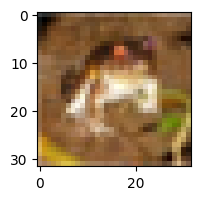

In [11]:
plt.figure(figsize=(20,2))
plt.imshow(x_train[0])


In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

CIFAR10 dataset contains 10 mutually exclusive classes

In [14]:
classes = ['Airplane','Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [15]:
print(classes[9])

Truck


In [16]:
def plot(x,y,index):
    plt.figure(figsize=(20,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])


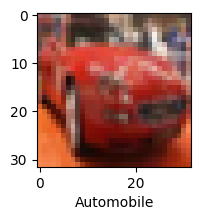

In [17]:
plot(x_train, y_train, 5)

Normalizing the training dataset

In [18]:
X_train = x_train / 255
X_test = x_test / 255

Build the Convolutional Neural Network

In [19]:
cnn_model = models.Sequential([

    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),

    

])

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
cnn_model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])


cnn_model.fit(X_train, y_train,epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.3769 - loss: 1.7067
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.5927 - loss: 1.1552
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6528 - loss: 1.0007
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6829 - loss: 0.9076
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7057 - loss: 0.8416
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7302 - loss: 0.7718
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7536 - loss: 0.7088
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7710 - loss: 0.6593
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7863 - loss: 0.6180
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7975 - loss: 0.5855


In [21]:
test_loss, test_accuracy = cnn_model.evaluate(X_train, y_train)
print('Test Accuracy:',test_accuracy)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8290 - loss: 0.5000
Test Accuracy: 0.8258600234985352


Predict the classsification using the trained model for the test dataset

In [22]:
y_pred = cnn_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [23]:
y_pred[0]

array([4.1614445e-03, 9.2153296e-06, 2.5471891e-04, 5.5439305e-01,
       4.9834813e-05, 5.8168559e-03, 6.5545931e-02, 3.5365782e-05,
       3.6965972e-01, 7.3897318e-05], dtype=float32)

In [24]:
y_pred.shape

(10000, 10)

In [25]:
y_classes = [np.argmax(i) for i in y_pred]
y_classes[:20]

[3, 8, 8, 0, 4, 6, 1, 6, 3, 1, 4, 9, 5, 7, 9, 8, 3, 7, 8, 6]

In [26]:
Y_test = y_test.reshape(-1)
Y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

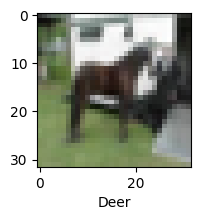

In [27]:
plot(X_test, y_classes, 20)

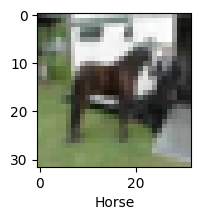

In [28]:
plot(X_test, Y_test,20 )

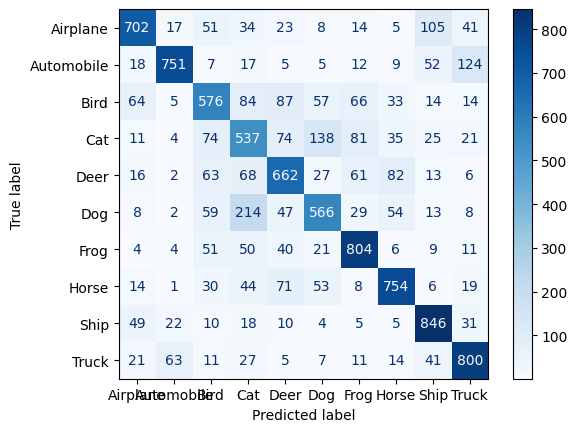

In [35]:
cm=confusion_matrix(Y_test,y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Airplane','Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])
disp.plot(cmap="Blues")


We can see that there are difference in the classes predicted by the cnnmodel and the actual class of the image

Now, let's try this model on a new image

In [37]:
from PIL import Image


# Load the image
image = Image.open("bird.jpg")


In [38]:
image_resized  = image.resize((32,32))
image_array = np.array(image_resized)

image_normalized = image_array / 255

In [39]:
image_normalized.shape

(32, 32, 3)

In [40]:
# Add a batch dimension
image_input = np.expand_dims(image_normalized, axis=0)
image_input.shape

(1, 32, 32, 3)

In [41]:
predictions = cnn_model.predict(image_input)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[5.9321667e-03 3.1863117e-05 9.9020994e-01 2.4395926e-04 1.6372043e-03
  4.6372465e-05 1.6820936e-03 3.0483525e-07 2.1414451e-04 2.0188779e-06]]


In [42]:
predictions.shape

(1, 10)

In [43]:
image_class = np.argmax(predictions)
print(image_class)

2


Text(0.5, 0, 'Bird')

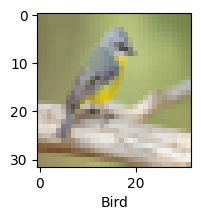

In [44]:
plt.figure(figsize=(20,2))
plt.imshow(image_array)
plt.xlabel(classes[image_class])

We can see that the trained model worked accurately on a completely new image. 